In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

In [3]:
# Merge transactions with customer data
merged_df = transactions.merge(customers, on='CustomerID')


In [4]:
# Aggregating transaction data per customer
customer_features = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean',  # Price per product purchased on average
    'Region': lambda x: x.mode()[0]  # Most common region
}).reset_index()


In [5]:
# Encoding categorical features (Region)
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)


In [6]:
# Standardizing numerical features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))


In [7]:
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_features_scaled)
    inertia.append(kmeans.inertia_)


Text(0, 0.5, 'Inertia')

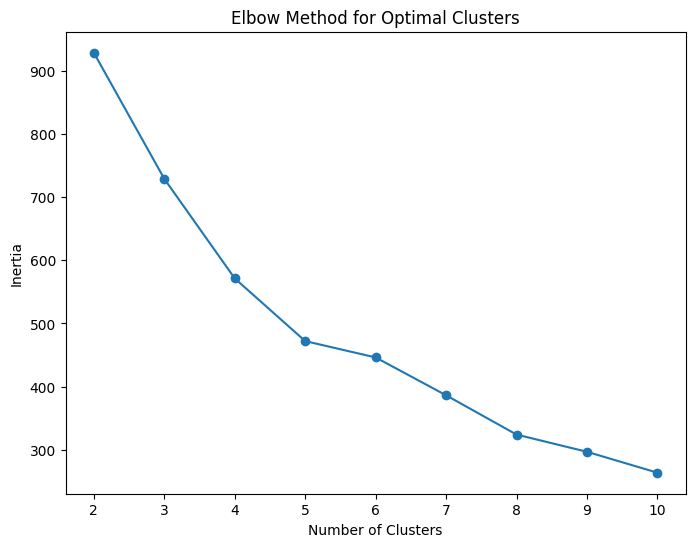

In [8]:
plt.figure(figsize=(8,6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [9]:
# Applying KMeans clustering with 4 clusters (from the Elbow Method result)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features_scaled)

# Add the cluster labels to the customer_features DataFrame


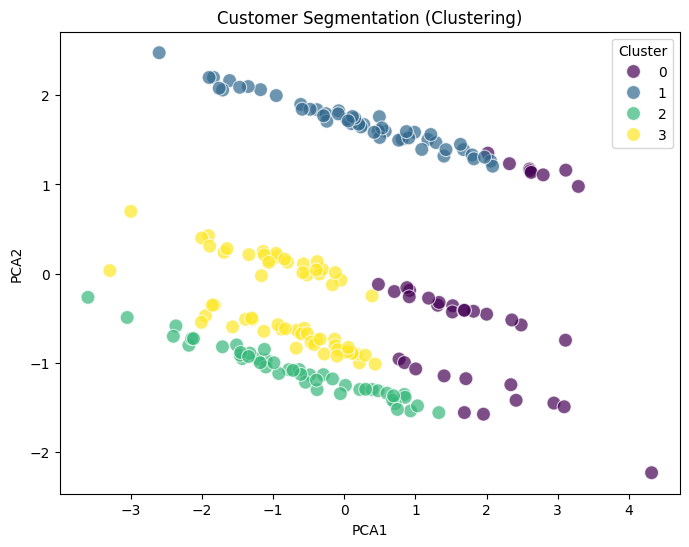

In [10]:
from sklearn.decomposition import PCA

# Reducing the dimensionality of the features to 2D for visualization
pca = PCA(n_components=2)
customer_features_pca = pca.fit_transform(customer_features_scaled)

# Add PCA components to the DataFrame
customer_features['PCA1'] = customer_features_pca[:, 0]
customer_features['PCA2'] = customer_features_pca[:, 1]

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=customer_features, s=100, alpha=0.7)
plt.title('Customer Segmentation (Clustering)')
plt.show()


In [11]:
# Calculate Davies-Bouldin Index for clustering evaluation
db_index = davies_bouldin_score(customer_features_scaled, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 1.1714695644070179


In [14]:
# Save the clustering results
customer_features[['CustomerID', 'Cluster']].to_csv('NavyaSri_SatyaShanmukhi.csv', index=False)

print("Clustering results saved to NavyaSri_SatyaShanmukhi_Clustering.csv")


Clustering results saved to NavyaSri_SatyaShanmukhi_Clustering.csv
